(c) Juan Gomez 2020. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# Problemas con CF de Neumann

### Introducción.

En el problema de valores en la frontera de teoría de la elasticidad las condiciones de contorno generalmente son de 2 tipos:

- Dirichlet, equivalentes a conocer la solución por desplazamientos en una parta de la frontera que denominaremos $S_u$.
- Neumann, equivalentes a conocer el vector de tracciones en una parte de la forntera que denominaremos $S_t$. (Note que el vector de tracciones es función de la derivada del campo de desplazamientos).

Para que un problema de elasticidad tenga solución, y esta sea única las condiciones de frontera tienen que satisfacer:

\begin{equation}
S_t\cup S_u=S \\
S_t\cap S_u=\varnothing
\end{equation}

En este taller se abordan algunos problemas simples con condiciones de frontera de Neumann por medio de métodos de elementos finitos basado en desplazamientos.

### Contenido

* Identificación de condiciones de frontera.

* Rutinas para creación de archivos de carga para **SolidsPy**.

* Análisis del modelo en **SolidsPy**.

* Otros problemas similares.

### Presa sometida empuje de fluido



<center><img src="img/dam.png" alt="files" style="width:500px"></center>





El campo de tensiones solución al problema de la figura esta dado por:


\begin{equation}
\sigma_{yy}= \gamma(H-y)-2\gamma x \\
\sigma_{xx}=-\gamma(H-y) \\
\tau_{xy}=-\gamma x
\end{equation}

### Condiciones de frontera

- Para cada una de las superficies del sólido:
  - (i)Escribir el vector normal a la superficie.
  - (ii)Indicar si la condición de frontera es de Dirichlet o de Neumman.
  - (iii)Especificar la condición de frontera.

### Equilibrio

Verificar el equilibrio global del sólido usando las condiciones de frontera especificadas en el paso anterior.

### Modelo por elementos finitos

<div class="alert alert-warning">
    
Generar un modelo por elementos finitos para el problema. Para ejecutar el análisis se requieren los siguientes archivos:


1. **/files/modelo_presa.geo** Geometría de la presa.

2. **/files/modelo_presa.msh** Malla por elementos finitos de la presa.

3. **/files/meshio_to_solids.py** Script para escribir archivos de texto a partir de la malla de gmsh.

4. **(opcional)/files/ejecucion.py** Script para ejecutar solidsPy en modo automatico.

</div>


En esta sección se ejectuta **SolidsPy** en modo paso-a-paso.

- Se importan los modulos necesarios para el análisis.

In [1]:
%matplotlib notebook
import numpy as np
import solidspy.preprocesor as msh
import solidspy.postprocesor as pos
import solidspy.assemutil as ass
import solidspy.solutil as sol

- Se cargan los archivos de texto (previamente creados usando **meshio_to_solids.py**)

In [2]:
nodes    = np.loadtxt('files/nodes.txt' , ndmin = 2)
mats     = np.loadtxt('files/mater.txt' , ndmin = 2)
elements = np.loadtxt('files/eles.txt' , ndmin = 2 , dtype =np.int)
cargas   = np.loadtxt('files/loads.txt' , ndmin = 2)

- Se ejecutan los siguientes pasos:
  - Se calcula el operador ensamblador DME() usando nodos y elementos.
  - Se ensambla la matriz de rigidez y el vector de cargas para sólido.
  - Se resuelve el sistema de ecuaciones. (El vector UC almacena los desplazamientos conocidos y desconocidos).
  - Se calcula el campo de deformaciones y tensiones.
  - Se visualiza la solución.

In [3]:
DME , IBC  , neq = ass.DME(nodes , elements )
mat_rigidez = ass.assembler(elements, mats, nodes , neq, DME)
vec_cargas = ass.loadasem(cargas , IBC , neq )
UG = sol.static_sol(mat_rigidez , vec_cargas)
UC = pos.complete_disp(IBC , nodes , UG)
E_nodes , S_nodes = pos.strain_nodes(nodes , elements, mats , UC)

<IPython.core.display.Javascript object>


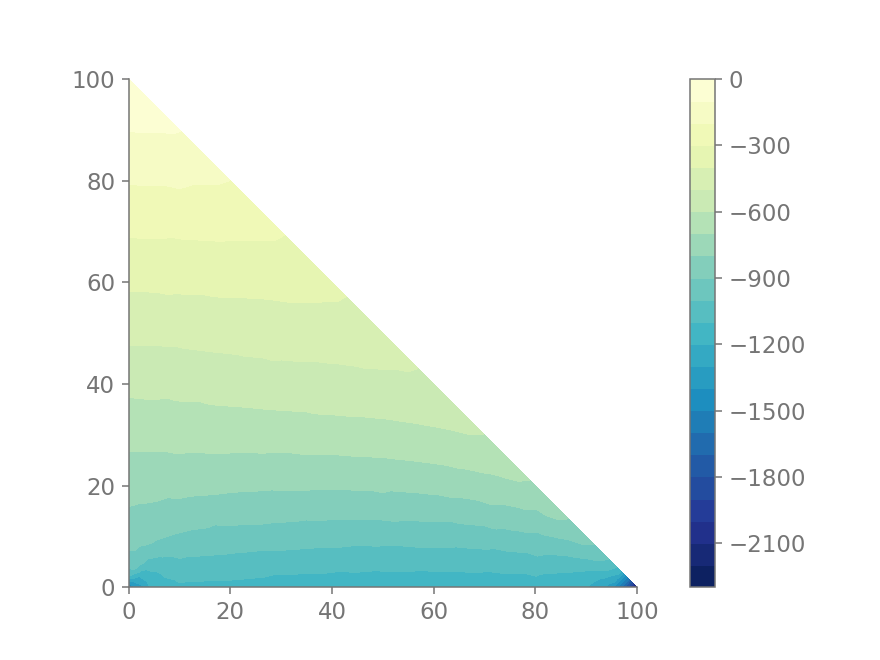

C:\Users\AX201 GMRS\Anaconda3\lib\site-packages\solidspy\postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


<IPython.core.display.Javascript object>


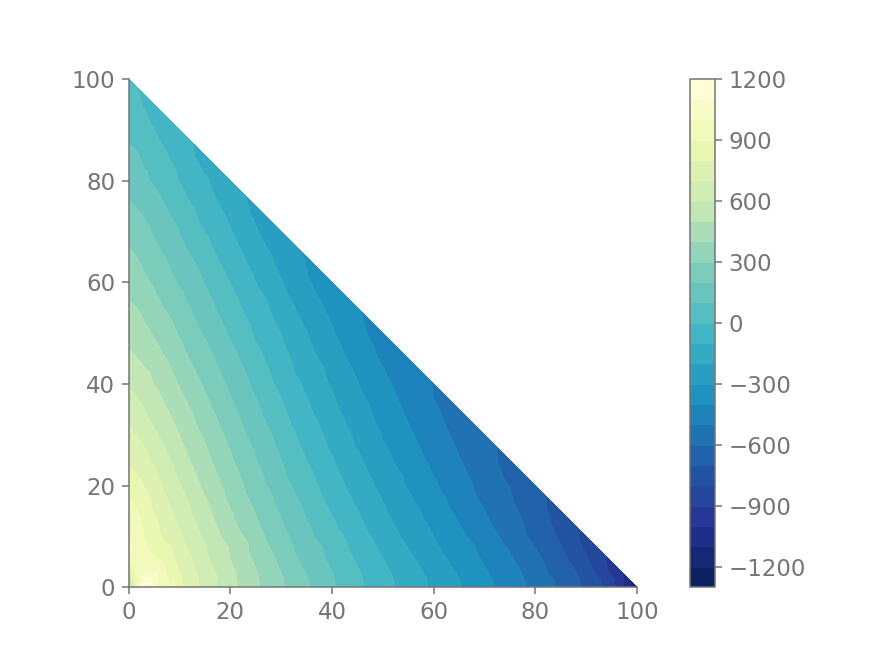

<IPython.core.display.Javascript object>


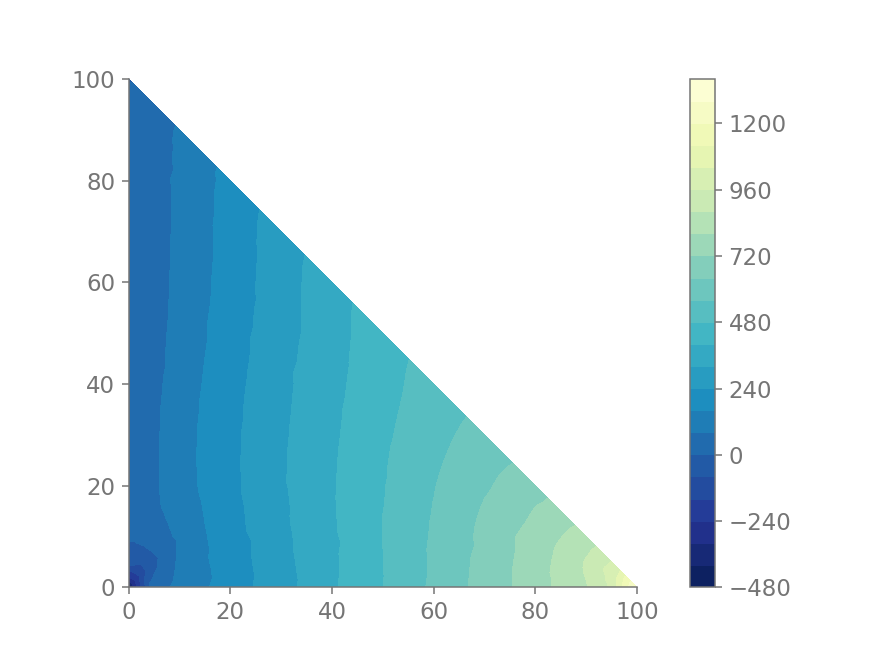

In [4]:
titulos = ('Sxx' , 'Syy' , 'Txy')
pos.plot_node_field(S_nodes, nodes, elements, plt_type='contourf', levels=24 , figtitle=titulos)

### Preguntas propuestas.

- **1)** Usando 3 mallas diferentes (una muy gruesa, una mediana y una muy refinada) repita el análisis y comente sobre los resultados visuales para cada una.

- **2)** Usando las visualizaciones obtenidas para la malla mas fina realizar las siguientes actividades:

    * Discuta sobre las condiciones de frontera del resultado numérico.
    
    * Considerando las tensiones a flexión (en este caso $\sigma_{yy}$) identifique la localización del eje neutro (entregue su solución graficamente).
    
    * Realice un corte con una sección transversal perpendicular al eje neutro y sobre esta grafique la distribución del vector de tracciones.
    
    * Identifique los valotes máximos y las localizaciones de:
    
        * Esfuerzo a tracción.
        * Esfuerzo a compresión.
        * Esfuerzo cortante.
        
    * Suponiendo que la resistencia a la tracción del material del que se va a construir la presa es $\sigma = 500 KPa$ identifque la presa de altura máxima posible.
    
- **3)** Cambie las condiciones de frontera del problema asumiendo ahora que la carga sobre la cara vertical es uniformemente distribuida. Comente sus resultados.

- **4)** Modifique ligeramente el diseño de la presa de manera que esta ahora tiene una pequeña cresta de ancho $b = H/10$ y repita el análisis. Comente sus resultados.
    
- **5)** A partir del modelo geométrico de la presa genere un nuevo modelo que asuma que la presa reposa sobre un semi-espacio elástico mas felxible (y mas rigido) que la presa. Comente sobre la variación de los resultados.    

### Otros casos con condiciones de frontera de Neumann

A continuación se presentan otros problemas simples con solución conocida y condiciones de frontera de Neumann. Para cada uno de ellos se pide:

  - (i)Escribir el vector normal a la superficie.
  - (ii)Especificar el vector de tracciones sobre toda la superficie.
  - (iii)Proponer un modelo por elementos finitos para tratar de reproducir la solución.

* (1) Viga bajo carga uniforme.

<center><img src="img/beam.png" alt="files" style="width:500px"></center>


\begin{equation}
\sigma_{xx}=-\frac q{2I}\left(x^2y-\frac23y^3\right) \\
\sigma_{yy}=-\frac q{2I}\left(\frac13y^3-c^2y+\frac23c^3\right) \\
\tau_{xy}=-\frac q{2I}\left(c^2-y^2\right)x
\end{equation}


* (2) Cilindro sometido a presión en la superficie.

<center><img src="img/anillo.gif" alt="files" style="width:200px"></center>


\begin{equation}
\begin{split}
\sigma_{rr} & =  - \frac{\left( \frac{b^2}{r^2} - 1 \right)}{\left(\frac{b^2}{a^2} - 1\right)} p_a - \frac{\left(1 - \frac{a^2}{r^2} \right)} {\left(1 - \frac{a^2}{b^2} \right)} p_b \\
\sigma_{\theta\theta} & = \frac{\left(\frac{b^2}{r^2} + 1\right)}{\left(\frac{b^2}{a^2} - 1\right)} p_a - \frac{\left(1 + \frac{a^2}{r^2} \right)}{\left( 1 - \frac{a^2}{b^2}\right)} p_b
\end{split}
\label{slnc}
\end{equation}


* (3) Cuña auto-soportada.

<center><img src="img/cunia.gif" alt="files" style="width:300px"></center>

\begin{equation}
\begin{aligned}
\sigma_{xx}&=S\cot\phi\\
\sigma_{yy}&=-S\tan\phi\\
\tau_{xy}&=0
\end{aligned}
\label{solution}
\end{equation}

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()